In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m

## Электричество и магнетизм
### Электростатическое поле системы неподвижных электрических зарядов
Как известно, электрическое поле, создаваемое в вакууме неподвижным точечным электрическим зарядом $q$, в данной точке пространства характеризуется скалярным потенциалом

$$\tag{1} \phi(\vec{R})=\frac{1}{4\pi\epsilon_0}\frac{q}{|\vec{R}-\vec{r}|},$$

где $\vec R$ - радиус-вектор точки наблюдения, $\vec r$- радиус-вектор точки, в которой находится электрический заряд, $ε_0=8.85\cdot 10^{−12}\ \ ф/м$. Векторной характеристикой данного поля является напряженность $\vec E$

$$\tag{2} \vec{E}=-\vec\nabla_\phi(\vec R)=\frac{1}{4\pi\epsilon_0}\frac{q}{|\vec{R}-\vec{r}|^3}(\vec{R}-\vec{r})$$

Сила взаимодействия $\vec F$ двух точечных электрических зарядов $q_1$ и $q_2$ описывается законом Кулона:

$$\tag{3} \vec F = \frac{1}{4\pi\epsilon_0}\frac{q_1q_2}{|\vec{r_1}-\vec{r_2}|^3}(\vec{r_1}-\vec{r_2})$$

где $\vec r_1$, $\vec r_2$ - радиусы-векторы, зарядов соответственно. Скалярный потенциал электрической системы, состоящей из N электрических зарядов $q_1, q_2, . . . , q_N$, и напряженность электрического поля $\vec E$ удовлетворяют принципу суперпозиции:

$$\tag{4} \phi(\vec{R})=\frac{1}{4\pi\epsilon_0}\sum\limits_{i=1}^{N}\frac{q_i}{|\vec{R}-\vec{r_i}|}$$
$$\tag{5} \vec E(\vec R) = \frac{1}{4\pi\epsilon_0}\sum\limits_{i=1}^{N}\frac{q_i}{|\vec{R}-\vec{r_i}|^3}(\vec{R}-\vec{r_i})$$

где $\vec{r_i}$ - координата $i$-го заряда.
При анализе электростатических полей системы произвольно расположенных зарядов, характеризующихся скалярной функцией-потенциалом $φ(\vec R)$ и векторной функцией - напряженностью $\vec E$, возникает задача наглядного представления этих величин. Один из возможных способов представления потенциала электростатического поля реализуется следующей последовательностью действий:

- задание функции, возвращающей значения потенциала, вычисляемые в соответствии *(4)* в узлах заданной координатной сетки;
- задание дискретной координатной сетки;
- вычисление в соответствии с *(3)* значений $φ(\vec R)$ в каждом узле координатной сетки;
- построение графика поверхности и карты эквипотенциалей.

Следуя последовательности действий, описанной выше, создадим функцию $\phi(\vec R)$, выполняющую следующие действия:

- Задание функции, возвращающей значения потенциала в узлах координатной сетки, вычисляемых в соответствии с *(4)*
- q - вектор, содержащий значения электрических зарядов
- xq и yq - векторы, содержащие x-е и y-е координаты электрических зарядов

In [3]:
def phi(q, xq, yq, X, Y):
    e0 = 8.85e-12
    Nq = len(q)
    Nx = len(X)
    Ny = len(Y)
    
    M = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            s = 0
            for k in range(Nq):
                s = s + q[k]/((X[i] - xq[k])**2+(Y[j] - yq[k])**2)**0.5
            
            M[i, j] = s/(4*e0*m.pi)
    return M     

Функция возвращает матрицу размерности Nx × Ny, содержащую значения потенциала в соответствующих узлах координатной сетки.

<img src='images/potential.png'/>

**Рис. 1. К вычислению потенциала, создаваемого линейной системой точечных зарядов**

Вычислим потенциал, создаваемый системой, состоящей из $N = 50$ электрических зарядов, расположенных в точках с координатами *(рис. 1)*

$$ (-5R_0+\frac{10R_0}{N}\cdot i),\ \  y_i = 0,\ \  i = 0, . . . ,N. $$

Для проведения вычислений в качестве единиц измерения заряда будем использовать заряд электрона $e = 1.6 · 10^{−16} Кл$, единиц измерения длины - $R_0 = 10^{−6} м$. Решение данной задачи в python выполняется следующей последовательностью команд:

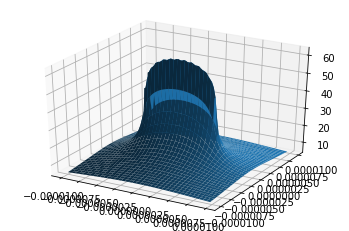

In [4]:
e=1.6e-16
R_0 = 1e-6
N = 50
q = []
for i in range(N):
    q.append(e)

x1 = -5*R_0
x2 = 5*R_0

xq = []
for i in range(N):
    xq.append(x1 + (x2 - x1)/N * i)
yq = np.zeros(N)

N1 = 79
x_min = -10*R_0
y_min = -10*R_0

x_max = 10*R_0
y_max = 10*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(y1, x1, M, linewidth=0)

#plt.show()


**Рис. 2. Визуализация потенциала, создаваемого системой линейных зарядов с помощью функции plot_surface**

Результат выполнения приведенной выше последовательности команд представлен на *рис. 2*. Для построения отображения поверхности без изображения сетки и заполнения поверхности с использованием интерполяции цвета дополнительно следует ввести команды:

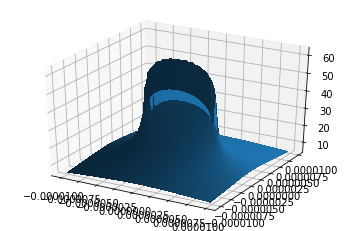

In [5]:
# ax.clear()
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(y1, x1, M, linewidth=0, antialiased=False)
plt.show()
# plt.show()

**Рис. 3. Визуализация потенциала, создаваемого системой линейных зарядов.**

Результаты их выполнения представлены на *рис. 3*.

Для построения двумерной карты линий уровня (эквипотенциалей) функции $φ = φ(x, y)$ следует ввести команды:

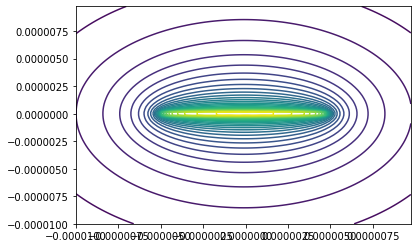

In [6]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, M, 33)

**Рис. 4. Карта эквипотенциалей функции $φ = φ(x, y)$**

Результат выполнения приведенных выше команд представлен на *рис. 4*. Для вывода значений соответствующей каждой эквипотенциали необходимо выполнить следующую последовательность команд:

<a list of 7 text.Text objects>

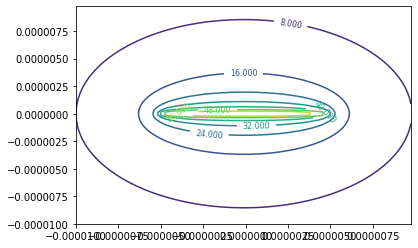

In [7]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
cont1 = ax3.contour(y1, x1, M)
ax3.clabel(cont1, inline=1, fontsize=8)

**Рис. 5. Карта эквипотенциалей функции φ = φ(x, y)**

Результат выполнения приведенных выше команд представлен на *рис. 5*.

Для построения трехмерной карты линий уровня (эквипотенциалей) функции $φ = φ(x, y)$ следует выполнить команды:

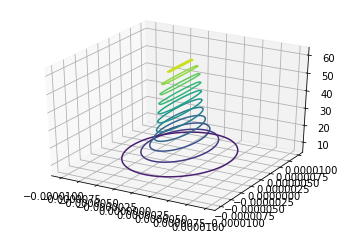

In [8]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
cont2 = ax4.contour(x1, y1, M, 11)

**Рис. 6. Проекция карты линий уровня на плоскость z = 0**

Результаты выполнения данной последовательности команд представлены на *рис. 6*.

B отличие от функции $\vec φ = φ(\vec R)$, напряженность электростатического поля $\vec E (\vec R)$ является векторной функцией, которая в каждой точке пространства характеризуется величиной поля и направлением. Для описания векторного поля будем использовать силовые линии - линии, касательные к которым в каждой точке параллельны вектору напряженности электрического поля. В связи с тем, что силовые линии несут только информацию о направлении вектора напряженности электрического поля, но не его величине, для анализа изменения величины напряженности электрического поля в пространстве будем использовать функцию $|\vec E(\vec R)|$. Таким образом, для исследования особенностей напряженности электрического поля, создаваемого произвольной конфигурацией электрических зарядов, следует:

- задать в пространстве дискретную координатную сетку;
- вычислить в узлах сетки координаты напряженности электрического поля $\vec E(\vec R))=(E_x, E_y)$;
- построить в каждом узле сетки единичные векторы $\vec n = \Bigg(\frac{E_x}{|\vec E|}, \frac{E_y}{|\vec E|}\Bigg)$, касательные к силовой линии электрического поля;
- построить график поверхности и карту линий уровня функции $|\vec E(\vec R)|$

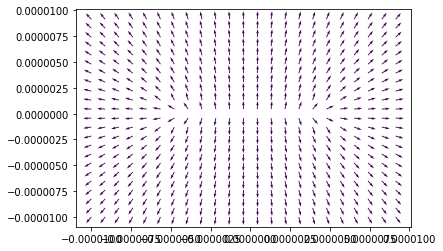

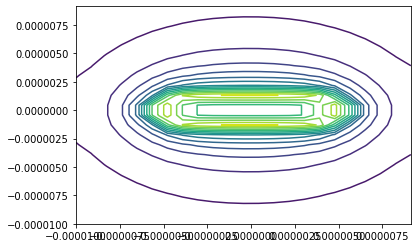

In [9]:
e=1.6e-16
R_0 = 1e-6
N = 50
q = []
for i in range(N):
    q.append(e)

x1 = -5*R_0
x2 = 5*R_0

xq = []
for i in range(N):
    xq.append(x1 + (x2 - x1)/N * i)
yq = np.zeros(N)

N1 = 23
x_min = -10*R_0
y_min = -10*R_0

x_max = 10*R_0
y_max = 10*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)
px, py = np.gradient(-M, 0.1, 0.1)

px1 = px/((px**2 + py**2)**0.5)
py1 = py/((px**2 + py**2)**0.5)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
quiv = ax1.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, mp, 17)

**Рис. 7. Визуализация силовых линий напряженности электростатического поля, создаваемого линейной системой зарядов**

**Рис. 8. Карта линий равной напряженности электростатического поля, создаваемого линейной системой зарядов**

Результаты выполнения приведенной выше последовательности команд представлены на *рис. 7* (векторное поле), *рис. 8* (линии равной напряженности).
### Задание:
#### Напишите программу, позволяющую строить потенциал и напряженность электрического поля диполя, считая, что составляющие его электрические заряды одинаковы по величине и противоположны по знаку.

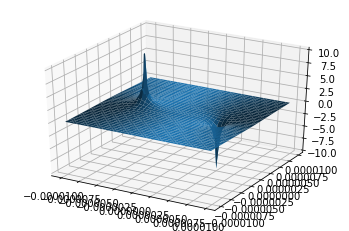

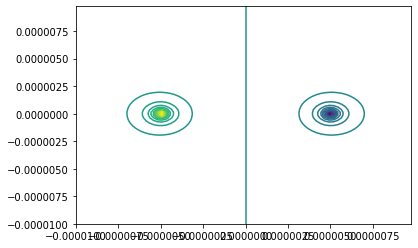

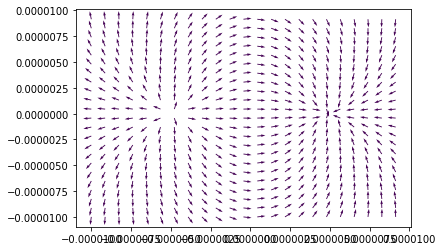

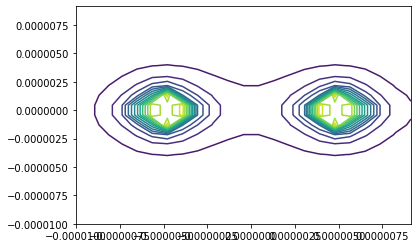

In [14]:
e=1.6e-16
R_0 = 1e-6
N = 2
q = []
q.append(e)
q.append(-e)

x1 = -5*R_0
x2 = 5*R_0

xq = []
xq.append(x1)
xq.append(x2)
yq = np.zeros(N)

N1 = 79
x_min = -10*R_0
y_min = -10*R_0

x_max = 10*R_0
y_max = 10*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(y1, x1, M, linewidth=0)

plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, M, 33)

N1 = 23
x_min = -10*R_0
y_min = -10*R_0

x_max = 10*R_0
y_max = 10*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)
px, py = np.gradient(-M, 0.1, 0.1)

px1 = px/((px**2 + py**2)**0.5)
py1 = py/((px**2 + py**2)**0.5)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
quiv = ax1.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, mp, 17)

### Задание:
#### Напишите программу, позволяющую строить потенциал и напряженность электрического поля квадроуполя, то есть электрическую систему, состоящую из четырех равных по абсолютной величине электрических зарядов, расположенных в вершинах квадрата, считая, что электрические заряды, расположенные в соседних вершинах, имеют разный знак.

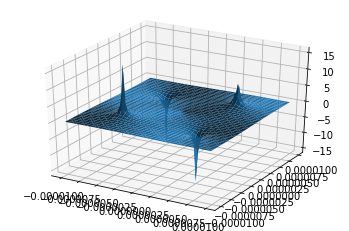

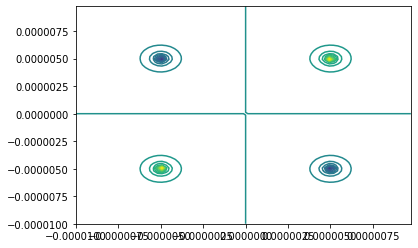

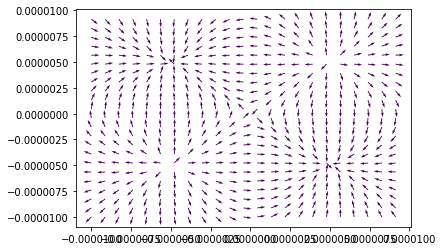

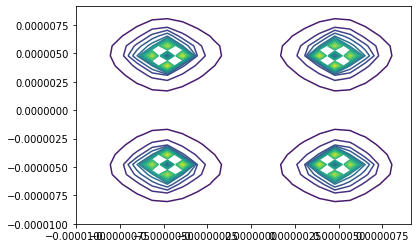

In [17]:
e=1.6e-16
R_0 = 1e-6
N = 4
q = []
for i in range(N//2):
    q.append(e)
    q.append(-e)

x1 = -5*R_0
x2 = 5*R_0

xq = []
yq = []
xq.append(x1)
yq.append(x1)
xq.append(x2)
yq.append(x1)
xq.append(x2)
yq.append(-x1)
xq.append(x1)
yq.append(-x1)

N1 = 79
x_min = -10*R_0
y_min = -10*R_0

x_max = 10*R_0
y_max = 10*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(y1, x1, M, linewidth=0)

plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, M, 33)

N1 = 23
x_min = -10*R_0
y_min = -10*R_0

x_max = 10*R_0
y_max = 10*R_0

x = []
y = []
for i in range(N1):
    x.append(x_min+(x_max-x_min)/N1*i)
    y.append(y_min + (y_max-y_min)/N1*i)
    
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)
px, py = np.gradient(-M, 0.1, 0.1)

px1 = px/((px**2 + py**2)**0.5)
py1 = py/((px**2 + py**2)**0.5)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
quiv = ax1.quiver(y1, x1, px1, py1, 0.5)

mp = (px**2 + py**2)**0.5

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
cont = ax2.contour(y1, x1, mp, 17)

### Магнтиное поле витка с постоянным током
Изучение электрических полей систем неподвижных электрических зарядов, проведенное нами в предыдущем разделе, было основано на законе Кулона *(3)* и принципе суперпозиции *(4)*, *(5)*. Закон Кулона в электростатике имеет аналог в магнитостатике - закон Био-Савара-Лапласа, в соответствии с которым напряженность магнитного поля, создаваемого элементом тока $Id\vec l$, имеет вид

$$\tag{6} d\vec{B}=\frac{\mu_0}{4\pi}I\frac{[d\vec{l}\times\vec{R}]}{|\vec R|^3}$$

где $I$ - величина тока, измеряется в амперах *A*, напряженность магнитного поля $\vec B$ - в теслах *(Тл)*, $μ_0 = 4π · 10^{−7}\ \ м/А$ - магнитная проницаемость вакуума. Закон Био-Савара-Лапласа имеет в магнитостатике совершенно общий характер и вместе с принципом суперпозиции может быть использован для нахождения напряженности магнитного поля, создаваемого произвольной системой постоянных токов, в любой точке пространства. Действительно, так как напряженность магнитного поля, создаваемого элементом тока $Idl$, расположенном в точке с радиусом вектором $\vec r$, в точке наблюдения с радиусом-вектором $\vec R$ равна

$$\tag{7} d\vec{B}=\frac{\mu_0}{4\pi}I\frac{[d\vec{l}\times(\vec{R} - \vec{r})]}{|\vec R - \vec r|^3}$$

то для вычисления напряженности магнитного поля, создаваемого произвольной системой постоянных токов, следует задать ориентацию каждого элемента тока , входящего в структуру, и вычислить напряженности магнитных полей, создаваемых каждым элементом тока $Id\vec{l}$, и, в соответствии с принципом суперпозиции, произвести суммирование напряженностей магнитных полей:

$$\tag{8} d\vec{B}=\frac{\mu_0}{4\pi}I\sum\limits_{i=1}^{N}\frac{[d\vec{l}_i\times(\vec{R} - \vec{r_i})]}{|\vec R - \vec r_i|^3}$$

где $N$ - число элементов, $\vec r_i$ - радиус-вектор соответствующего элемента.

Отметим, что вычислить магнитное поле аналитически, используя *(7)*, *(8)*, оказывается возможным только для структур, имеющих достаточно высокую степень симметрии (прямой провод, поле кольца на оси симметрии и т. д.). Для большинства токовых конфигураций расчет магнитного поля может быть проведен только численно. Наиболее важными геометрическими конфигурациями токовых структур, для которых необходимо знать распределение напряженности магнитного поля, являются: прямой провод, петля, соленоид, тороидальная обмотка. Далее мы опишем подход, позволяющий вычислять магнитное поле петли с постоянным током. 

<img src='images/ring_mag_ele.png' />

**Рис. 9. К расчету напряженности магнитного поля петли с током**

Для расчета напряженности магнитного поля петли с током выберем систему координат, в которой плоскость XOY совпадает с плоскостью петли *(рис. 9)*. В выбранной системе координат положение $i$-го элемента тока $Id\vec l$

$$\tag{9} d\vec l_i = Ia\left[
  \begin{array}{ccc}
     sin\ \phi_i \\
     -cos\ \phi_i \\
     0 \\
  \end{array}
\right]d\phi_i$$

где $dφ = \frac{2π}{N}, φ_i = idφ, i = 0, 1, . . . ,N−1, N$ - число элементов тока, описывается радиусом-вектором $\vec r_i$:

$$\tag{10} \vec r_i = a\left[
  \begin{array}{ccc}
     cos\ \phi_i \\
     sin\ \phi_i \\
     0 \\
  \end{array}
\right]$$

Подставив *(9)*, *(10)* в *(8)*, нетрудно получить выражения для составляющих вектора напряженности магнитного поля $B_x$, $B_y$, $B_z$, однако для расчета напряженности и визуализации магнитного поля в Python и NumPy этого не требуется, так как в пакет встроены функции для вычисления стандартных действий векторного анализа: вычисление скалярного произведения, векторного произведения и т. д.

На примере вычисления и визуализации напряженности магнитного поля, создаваемого витком с током в плоскости $x = 0$, опишем последовательность действий, позволяющих решить поставленную задачу. В рассматриваемой плоскости, как очевидно из соображений симметрии, составляющая напряженности магнитного поля вдоль оси *OX* равна нулю, поэтому далее мы проводим вычисления только составляющих напряженности вдоль осей *OY* , *OZ*. Так как далее нас будет интересовать форма силовых линий, но не абсолютное значение напряженностей, множитель $a$ будем полагать равным единице. Сначала необходимо создать фуекцию, возвращающую значения составляющих напряженности магнитного поля, листинг которой мы приводим ниже:

In [19]:
def ring(a, y, z):
    Nstep = 100
    x = 0
    Ny = len(y)
    Nz = len(z)
    
    delta_phi = 2*m.pi / Nstep
    
    phi = [delta_phi * (n-1) for n in range(1, Nstep + 2)]
        
    By = np.zeros((Ny, Nz), dtype=np.float64)
    Bz = np.zeros((Ny, Nz), dtype=np.float64)
        
        
    for i in range(Ny):
        for j in range(Nz):
            s = np.array([0, 0, 0], dtype=np.float64)
            
            for n in range(Nstep+1):
                dL = np.array([-a*m.sin(phi[n]) * delta_phi, a*m.cos(phi[n])*delta_phi, 0])
                r = np.array([a*m.cos(phi[n]), a*m.sin(phi[n]), 0])
                R = np.array([x, y[i], z[j]])
                s = s + np.cross(dL, (R-r))/(np.dot((R-r), (R-r)[None].T.conj()))**(3/2)
            
            By[i][j] = s[1]
            Bz[i][j] = s[2]
            
    return (By, Bz)

Далее необходимо выполнить следующую последовательность команд:

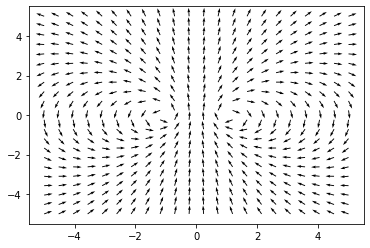

In [20]:
N1 = 21
y_min = -5
z_min = -5
y_max = 5
z_max = 5
y = []
z = []
for i in range(1, N1+2):
    y.append(y_min + (y_max - y_min)/N1 * (i-1))
    z.append(z_min + (z_max - z_min)/N1 * (i-1))
    
a = 1
By, Bz = ring(a, y, z)

mp = (By**2 + Bz**2)**0.5

by = By / mp
bz = Bz / mp

y1, z1 = np.meshgrid(y, z)

fig = plt.figure()
ax = fig.add_subplot(111)
quiv = ax.quiver(z1, y1, by, bz)

**Рис. 10. Поле единичных векторов, касательных к силовой линии магнитного поля, создаваемого витком с током**

Результаты выполнения приведенной выше последовательности команд представлены на *рис. 10*. Анализ *рис. 10* позволяет сделать вывод о том, что поле единичных векторов позволяет на качественном уровне получать информацию о форме силовых линий и направления напряженности магнитного поля в данной точке координатной сетки.

Определенный недостаток технологии визуализации силовых линий магнитного поля состоит в том, что линия, являющаяся по своей физической сути непрерывной, заменяется набором векторов, касательных к данной линии. Для получения более адекватного изображения силовых линий магнитного поля можно использовать векторный потенциал магнитного поля $\vec A$, связанный с напряженностью магнитного поля следующим соотношением:

$$\tag{11} \vec B = \operatorname{rot} \vec A$$

Используя *(11)*, можно показать, что силовая линия есть линия, на которой $|\vec{A}(x, y, z)| = const$. Следовательно, для построения силовой линии магнитного поля необходимо вычислить модуль векторного потенциала в узлах координатной сетки и затем построить карту эквипотенциалей.

Векторный потенциал магнитного поля, создаваемого элементом тока $Id\vec l$, равен

$$\tag{12} d\vec A=\frac{\mu_0}{4\pi}\frac{Id\vec l}{|\vec R - \vec r|}$$

где $\vec R$ - радиус-вектор точки наблюдения, $\vec r$ - радиус-вектор элемента тока. Векторный потенциал магнитного поля $\vec A$, создаваемого произвольной системой токов $Id\vec l_i$, в соответствии с принципом суперпозиции, равен

$$\tag{13} \vec A = \sum\limits_{i=1}^{N}d\vec A_i=\frac{\mu_0}{4\pi}\sum\limits_{i=1}^{N}\frac{Id\vec l_i}{|\vec R - \vec r_i|}$$

Для практической реализации предложенного алгоритма, как и ранее, сначала необходимо создать функцию *ringA*, возвращающую значения составляющих напряженности магнитного поля, листинг которой мы приводим ниже:

In [11]:
def ringA(a, y, z):
    Nstep = 100
    x = 0
    Ny = len(y)
    Nz = len(z)
    
    delta_phi = 2*m.pi / Nstep
    
    phi = []
    for n in range(1, Nstep+2):
        phi.append(delta_phi * (n-1))
        
    ax = np.zeros((Ny, Nz), dtype=np.float64)
    ay = np.zeros((Ny, Nz), dtype=np.float64)
    az = np.zeros((Ny, Nz), dtype=np.float64) 
        
    for i in range(Ny):
        for j in range(Nz):
            s = np.array([0, 0, 0], dtype=np.float64)
            
            for n in range(Nstep+1):
                dL = np.array([-a*m.sin(phi[n]) * delta_phi, a*m.cos(phi[n])*delta_phi, 0])
                r = np.array([a*m.cos(phi[n]), a*m.sin(phi[n]), 0])
                R = np.array([x, y[i], z[j]])
                s = s + dL /(np.dot((R-r), (R-r)[None].T.conj()))**(1/2)
            
            ax[i][j] = s[0]
            ay[i][j] = s[1]
            az[i][j] = s[2]
    A = (ax**2 + ay**2 + az**2)**0.5
    return A

Далее необходимо выполнить следующую последовательность команд:

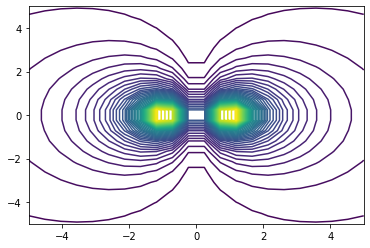

In [12]:
N1 = 21
y_min = -5
z_min = -5
y_max = 5
z_max = 5
y = []
z = []
for i in range(1, N1+2):
    y.append(y_min + (y_max - y_min)/N1 * (i-1))
    z.append(z_min + (z_max - z_min)/N1 * (i-1))
    
a = 1

mp = ringA(a, y, z)

y1, z1 = np.meshgrid(y, z)

fig = plt.figure()
ax = fig.add_subplot(111)

cont = ax.contour(z1, y1, mp, 55)

**Рис. 11. Карта эквипотенциалей функции $|\vec A|$**

Результаты выполнения приведенной выше последовательности команд представлены на *рис. 11*.

### Задание:
#### Как известно зависимость напряженность поля, создаваемого магнитным диполем $\vec{M}$, описывается формулой:

$$\vec{B}(\vec{R}) = \frac{3(\vec M \cdot \vec R)}{|\vec R|^5} - \frac{\vec M}{|\vec R|^3}$$

#### - Исследуйте особенности магнитного поля, создаваемого магнитным диполем. Рассмотрите магнитные поля на различных расстояниях от диполя.
#### - Сравните магнитные поля, создаваемые кольцом с током и магнитным диполем. Какой вывод можно сделать?

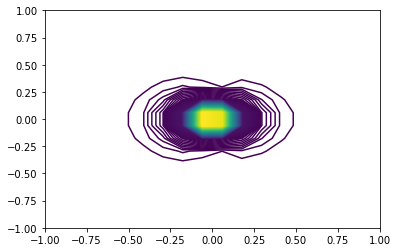

In [61]:
def dip(a, y, z):
    Nstep = 100
    x = 0
    Ny = len(y)
    Nz = len(z)
    
    By = np.zeros((Ny, Nz), dtype=np.float64)
    Bz = np.zeros((Ny, Nz), dtype=np.float64)
        
        
    for i in range(Ny):
        for j in range(Nz):
            R = (y[i], z[j])
            m_R = (y[i]**2+z[j]**2)**0.5
            c_dot =3*(np.dot(a, R))
            first_term = c_dot/(m_R**5)
            second_term = tuple(ti/(m_R**3) for ti in a)
            B = first_term - second_term
            By[i][j] = B[0]
            Bz[i][j] = B[1]

    return (By, Bz)

N1 = 17
y_min = -1
z_min = -1
y_max = 1
z_max = 1
y = []
z = []
for i in range(1, N1+2):
    y.append(y_min + (y_max - y_min)/N1 * (i-1))
    z.append(z_min + (z_max - z_min)/N1 * (i-1))
    
a = (1, 0)
By, Bz = dip(a, y, z)

mp = (By**2 + Bz**2)**0.5

by = By / mp
bz = Bz / mp

y1, z1 = np.meshgrid(y, z)

fig = plt.figure()
ax = fig.add_subplot(111)

cont = ax.contour(z1, y1, mp, 1000)

### Моделирование двиижения электрических зарядов в постоянном магнитном поле

Для описания движения заряда в постоянном магнитном поле при заданной зависимости напряженности магнитного поля от координат необходимо решить следующую систему ДУ:

$$\tag{14} \begin{array}{ccc}
     \frac{dp_x}{dt} = \frac{d(mv_x)}{dt} = q[\vec v \times \vec B(x,y,z)]_x, \\
     \frac{dp_y}{dt} = \frac{d(mv_y)}{dt} = q[\vec v \times \vec B(x,y,z)]_y, \\
     \frac{dp_z}{dt} = \frac{d(mv_z)}{dt} = q[\vec v \times \vec B(x,y,z)]_z. \\
  \end{array}$$

Далее в данном разделе рассмотрим моделирование движения электрических зарядов в постоянном однородном магнитном поле $\vec B$ при нерелятивистских скоростях. При движении со скоростями много меньшими скорости света система ДУ принимает вид

$$\tag{15} \begin{array}{ccc}
     \frac{dv_x}{dt} = \frac{q}{m_0}[\vec v \times \vec B(x,y,z)]_x, \\
     \frac{dv_y}{dt} = \frac{q}{m_0}[\vec v \times \vec B(x,y,z)]_y, \\
     \frac{dv_z}{dt} = \frac{q}{m_0}[\vec v \times \vec B(x,y,z)]_z. \\
  \end{array}$$

Предваряя численное решение системы ДУ *(15)*, введем безразмерные переменные $\tilde{t} = \frac{t}{T}$ , $\vec{\tilde{B}} = \frac{\vec B}{|\vec B|},\ \vec{\tilde{v}} =\frac{\vec{v}}{c}$ (*c*-скорость света), $\vec{\tilde{R}} = \frac{\vec{R}}{cT}$ , в которых система *(15)* принимает следующий вид:

$$\tag{16} \begin{array}{ccc}
     \frac{d}{d\tilde{t}} \tilde{v_x} = \frac{qT|\vec{B}|}{m_0}[\vec{\tilde{v}} \times \vec{\tilde{B}}]_x, \\
     \frac{d}{d\tilde{t}} \tilde{v_y} = \frac{qT|\vec{B}|}{m_0}[\vec{\tilde{v}} \times \vec{\tilde{B}}]_y, \\
     \frac{d}{d\tilde{t}} \tilde{v_z} = \frac{qT|\vec{B}|}{m_0}[\vec{\tilde{v}} \times \vec{\tilde{B}}]_z. \\
  \end{array}$$

Для выбора единиц измерения времени заметим, что на электрический заряд, движущийся в плоскости, перпендикулярной напряженности магнитного поля, действует сила, перпендикулярная его скорости. Следовательно, в данном случае заряд будет двигаться по окружности радиуса $R$ (ларморовской окружности), который можно найти из условия равенства центробежной силы и силы Лоренца

$$\tag{17} \frac{m_0v^2}{R} = qv|\vec{B}|$$

Откуда

$$\tag{18} R=\frac{m_0v}{q|\vec{B}|}$$

Вспоминая, что период обращения материальной точки, двигающейся по окружности с равномерной скоростью, равен длине окружности, деленной на модуль линейной скорости, и используя *(18)*, найдем

$$\tag{19} T = \frac{2\pi R}{v} = \frac{2\pi m_0}{qt|\vec B|}$$

Из *(19)* видно, что выбор периода обращения заряда по ларморовской окружности в качестве единицы измерения времени позволяет записать систему ДУ *(17)* в следующем виде:

$$\tag{20} \begin{array}{ccc}
     \frac{d\tilde{v_x}}{d\tilde{t}} = 2\pi[\vec{\tilde{v}} \times \vec{\tilde{B}}]_x = 2\pi(\tilde{v_y}\tilde{B_z} -\tilde{v_z}\tilde{B_y}), \\
     \frac{d\tilde{v_y}}{d\tilde{t}} = 2\pi[\vec{\tilde{v}} \times \vec{\tilde{B}}]_y = 2\pi(\tilde{v_z}\tilde{B_x} -\tilde{v_x}\tilde{B_z}), \\
     \frac{d\tilde{v_z}}{d\tilde{t}} = 2\pi[\vec{\tilde{v}} \times \vec{\tilde{B}}]_z = 2\pi(\tilde{v_x}\tilde{B_y} -\tilde{v_y}\tilde{B_x}). \\
  \end{array}$$

Отметим универсальность системы ДУ (20), заключающуюся в том, что в выбранной системе единиц коэффициенты системы не зависят от параметров заряда и напряженности магнитного поля, которые входят в безразмерные начальные условия:

- радиус-вектор начального положения зарядa

$$\vec{\tilde{R_0}}=\frac{\vec{R}}{cT}$$

- вектор начальной скорости

$$\vec{\tilde{v_0}}=\frac{\vec{v_0}}{c}$$

Легко видеть, что в однородном поле система уравнений *(20)* является замкнутой, так как уравнения зависят только от трех неизвестных функций $\tilde{v_x}(t),\ \tilde{v_y}(t),\ \tilde{v_z}(t)$. Найдя численное решение *(20)*, далее интегрированием зависимостей $\tilde{v_x}(t),\ \tilde{v_y}(t),\ \tilde{v_z}(t)$ можно определить зависимости $\tilde{x}(t),\ \tilde{y}(t),\ \tilde{z}(t)$. Однако оказывается более удобным дополнить *(20)* тремя уравнениями для координат:

$$\tag{21} \begin{array}{ccc}
     \frac{d\tilde{x}}{dt} = \tilde{v_x}, \\
     \frac{d\tilde{y}}{dt} = \tilde{v_y}, \\
     \frac{d\tilde{z}}{dt} = \tilde{v_z}. \\
  \end{array}$$

так как, решив более общую систему ДУ, состоящую из 6 дифференциальных уравнений, одновременно можно найти зависимости $\tilde{x}(t),\ \tilde{y}(t),\ \tilde{z}(t)$ и $\tilde{v_x}(t),\ \tilde{v_y}(t),\ \tilde{v_z}(t)$. Дополнительный аргумент в пользу данного подхода состоит в том, что общая система уравнений распадается на две независимые системы только для однородного магнитного поля. Для неоднородного поля следует решать систему ДУ, состоящую из 6 дифференциальных уравнений первого порядка. 

Для нахождения решения общей системы уравнений движения *(20)* следует создать вектор-функцию, стоящую в правой части системы ДУ. Ниже приводится листинг функции *lorenz_force*:

In [62]:
H = [0, 0, 1]

def lorenz_force(t, z):
    f = np.zeros(6)
    f[0] = z[1]
    f[1] = 2*m.pi*(H[2]*z[3] - H[1]*z[5])
    f[2] = z[3]
    f[3] = -2*m.pi*(H[2]*z[1] - H[0]*z[5])
    f[4] = z[5]
    f[5] = 2*m.pi*(H[1]*z[1] - H[0]*z[3])
    
    return f

Далее необходимо выполнить следующую последовательность команд:

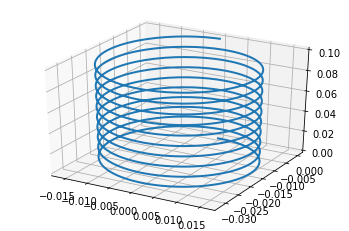

In [63]:
x0 = 0
y0 = 0
z0 = 0
vx0 = 0.1
vy0 = 0
vz0 = 0.01

t0, t1 = 0, 10                # start and end
t = np.linspace(t0, t1, 1000)  # the points of evaluation of solution
R0 = [x0, vx0, y0, vy0, z0, vz0]                   # initial value
#sol = integrate.odeint(lorenz_force, R0, t)
R = np.zeros((len(t), len(R0)), dtype=np.float64)   # array for solution
R[0, :] = R0
r = integrate.ode(lorenz_force).set_integrator("dopri5")  # choice of method
r.set_initial_value(R0, t0)   # initial values
for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
    if not r.successful():
        raise RuntimeError("Could not integrate")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#print(sol)
surf = ax.plot(R[:,0], R[:,2], R[:,4], linewidth=2)

**Рис. 12. Траектория движения заряда в постоянном магнитном поле**

Результат выполнения приведенной последовательности команд представлен на *рис. 12*.

### Задание:
#### 1. Постройте проекции траектории движения на соответствующие координатные плоскости.
#### 2. Проекция траектории движения на плоскость, перпендикулярную вектору напряженности магнитного поля, является окружностью. Определите ее радиус и период обращения по окружности. Объясните полученные результаты.
#### 3. Исследуйте зависимость величины шага спирали от скорости движения заряда.
#### 4. Постройте зависимости скорости и ее проекций на соответствующие координатные плоскости от времени.
#### 5. Исследуйте зависимость точности и устойчивости численного решения системы ДУ (6.43) от шага интегрирования.

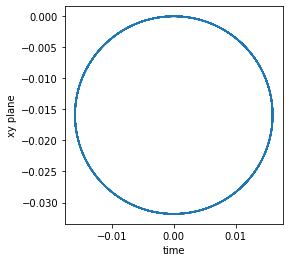

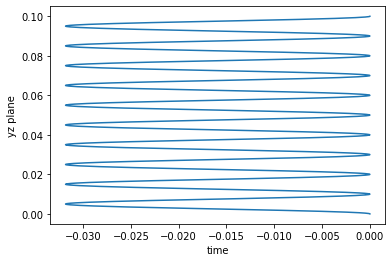

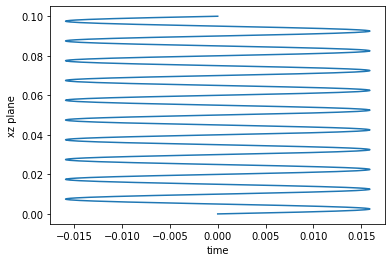

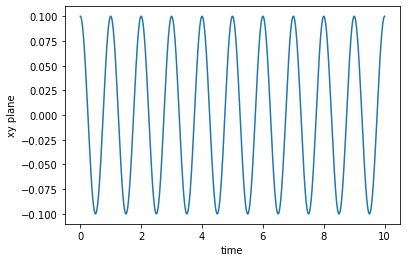

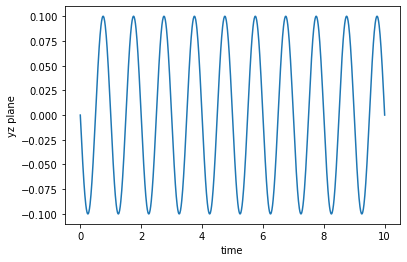

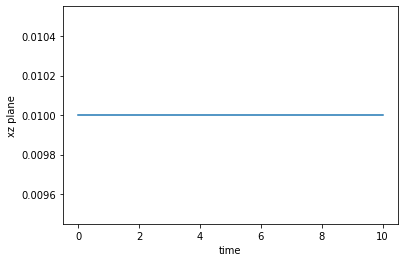

In [75]:
fig, ax = plt.subplots()
ax.set_aspect(1.0)
ax.plot(R[:, 0], R[:,2])
plt.xlabel('time')
plt.ylabel('xy plane')
plt.show()

plt.plot(R[:,2], R[:,4])
plt.xlabel('time')
plt.ylabel('yz plane')
plt.show()

plt.plot(R[:,0], R[:,4])
plt.xlabel('time')
plt.ylabel('xz plane')
plt.show()

plt.plot(t, R[:,1])
plt.xlabel('time')
plt.ylabel('xy plane')
plt.show()

plt.plot(t, R[:,3])
plt.xlabel('time')
plt.ylabel('yz plane')
plt.show()

plt.plot(t, R[:,5])
plt.xlabel('time')
plt.ylabel('xz plane')
plt.show()